In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from mlxtend.evaluate import bootstrap_point632_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras import models
from keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter




In [ ]:
data=pd.read_csv('bank-full.csv', sep=';')

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking for duplicated rows

In [ ]:
sum(data.duplicated())

0

## Exclude the 'duration' column from the data set

In [ ]:
data=data.drop('duration' , axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


## Is data balance?


no     0.883015
yes    0.116985
Name: y, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


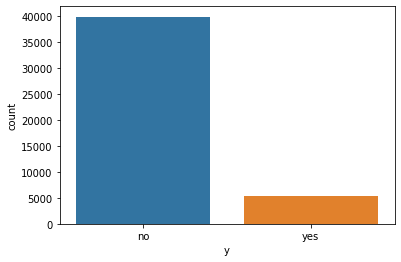

In [ ]:
sns.countplot(data['y'])
print(data['y'].value_counts()/len(data['y']))

# Correlation

In [ ]:
corr=data.corr()
corr

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


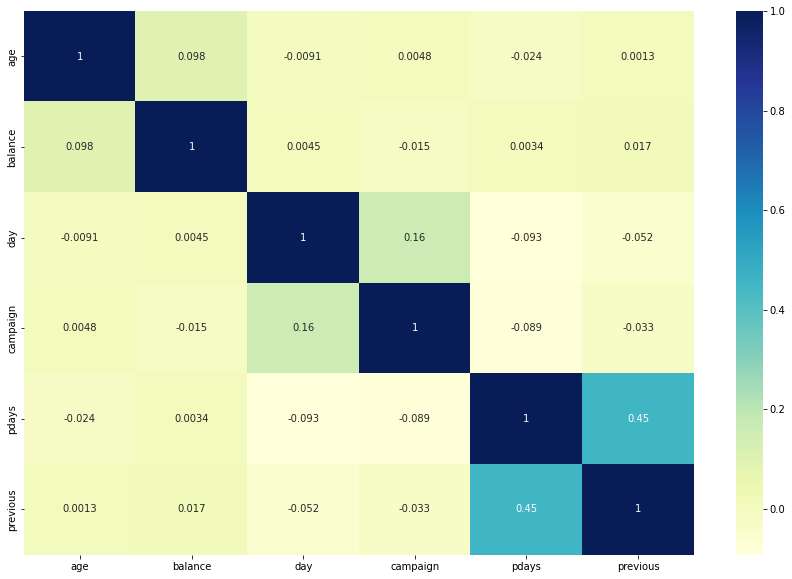

In [ ]:
# Visualizing the Correlation Matrix
fig,ax=plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr,annot=True,cmap='YlGnBu')

## Checking for Skewness

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age          0.684818
balance      8.360308
day          0.093079
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

## log transformation for Age

In [ ]:
#np.random.seed(0)
#age_trans = np.log(data['age'])


#fig, axs = plt.subplots(nrows=1, ncols=2)
#axs[0].hist(data['age'], edgecolor='black')
#axs[1].hist(age_trans, edgecolor='black')
#axs[0].set_title('Original Age')
#axs[1].set_title('Log Transformed Age')

##Cube root transformation for balance

In [ ]:
#np.random.seed(0)
#balance_trans = np.cbrt(data['balance'])


#fig, axs = plt.subplots(nrows=1, ncols=2)
#axs[0].hist(data['balance'], edgecolor='black')
#axs[1].hist(balance_trans, edgecolor='black')
#axs[0].set_title('Original Balance')
#axs[1].set_title('Cube Root Transformed Balance')

## Log transformation for campaign

In [ ]:
#np.random.seed(0)
#campaign_trans = np.log(data['campaign'])


#fig, axs = plt.subplots(nrows=1, ncols=2)
#axs[0].hist(data['campaign'], edgecolor='black')
#axs[1].hist(campaign_trans, edgecolor='black')
#axs[0].set_title('Original Campaign')
#axs[1].set_title('Log Transformed Campaign')

## Cube root transformation for previous

In [ ]:
#np.random.seed(0)
#previous_trans = np.cbrt(data['previous'])


#fig,axs = plt.subplots(nrows=1, ncols=2)
#axs[0].hist(data['previous'], edgecolor='black')
#axs[1].hist(previous_trans , edgecolor='black')
#axs[0].set_title('Original Previous')
#axs[1].set_title('Cube Root Transformed Previous')


In [ ]:
# convet skewed columns to the transformed values
#data['age']=age_trans
#data['balance']=balance_trans
#data['campaign']=campaign_trans
#data['previous']=previous_trans

## Convert  'day' column from numerical to *categorical*

In [ ]:
data['day']=data['day'].astype('category',copy=False)
print(data['day'].dtypes)

category


# Label Encoding of target variable

In [ ]:
le = preprocessing.LabelEncoder()
labels = data['y']
le.fit(labels)
data['y']=le.transform(labels)

In [ ]:
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

## column 'pday'
81% of data in this column is -1 which means client was not previously contacacted. so we can create new column based on this value.

In [ ]:
data['pdays'].value_counts()/len(data['pdays'])


-1      0.817367
 182    0.003694
 92     0.003251
 91     0.002787
 183    0.002787
          ...   
 449    0.000022
 452    0.000022
 648    0.000022
 595    0.000022
 530    0.000022
Name: pdays, Length: 559, dtype: float64

In [ ]:
# assign value 1 where the pdays is -1 and 0 to other values.
no_contact=[]
for i in data['pdays']:
  if i==-1:
    no_contact.append(1)
  else: no_contact.append(0)

In [ ]:
# add new columns to dataframe
data['no_contact']=no_contact
data['no_contact'].value_counts()

1    36954
0     8257
Name: no_contact, dtype: int64

## column 'poutcome'
Since about 81% of values in this column is 'unknown' so we drop this column.

In [ ]:
data['poutcome'].value_counts()/len(data['poutcome'])

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


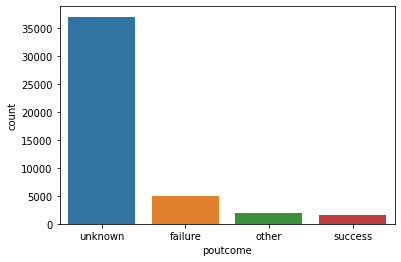

In [ ]:
sns.countplot(data['poutcome'])

In [ ]:
data=data.drop('poutcome',axis=1)

In [ ]:
categorical_cols = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month']
numerical_cols=['age','balance', 'day', 'campaign', 'pdays', 'previous', 'no_contact']

In [ ]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}

data['month']=data['month'].map(dictionary)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,1,-1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,1,-1,0,0


#Outliers

feature:  age
feature:  balance


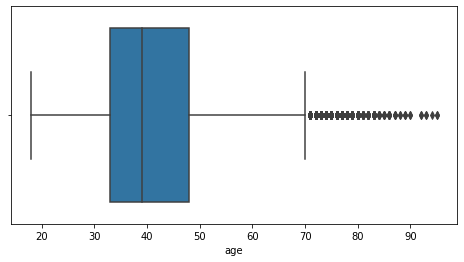

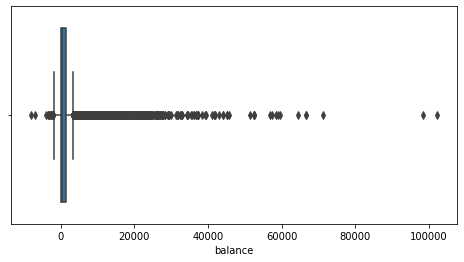

In [ ]:
#Boxplot WITH outliers
numeric_columns = ['age','balance']
for col_name in numeric_columns:
  print('feature: ', col_name)
  figure1 = plt.figure(figsize = (8,4))
  #plt.title (col_name,'With Outliers')s
  sns.boxplot(x = data[col_name])

  #IQR
  Q1 = data[col_name].quantile(0.25)
  Q3 = data[col_name].quantile(0.75)
  IQR = Q3-Q1

  mean1 = round(data[col_name].mean(),2)
  std1 = round(data[col_name].std(),2)
  median1 = round(data[col_name].median(),2)
  data = data[(data[col_name] > (Q1 - 1.5 * IQR)) & (data[col_name] < (Q3 + 1.5 * IQR))]


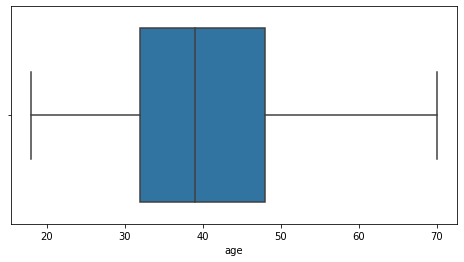

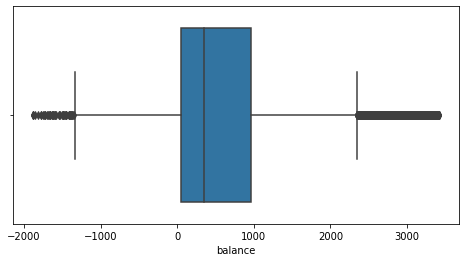

In [ ]:
##Boxplot WITHOUT outliers
numeric_columns = ['age','balance']
for col_name in numeric_columns:
  plt.figure(figsize = (8,4))
  sns.boxplot(x = data[col_name])

# Split the data to train and test set

In [ ]:
X=data.drop('y' ,axis =1)
y= data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,no_contact
38903,44,entrepreneur,married,primary,no,1434,yes,no,cellular,18,5,3,-1,0,1
18787,26,admin.,single,secondary,no,-14,no,no,cellular,31,7,31,-1,0,1
38676,37,blue-collar,divorced,secondary,no,625,yes,no,cellular,15,5,4,359,2,0
13744,49,blue-collar,married,secondary,no,360,no,no,cellular,10,7,1,-1,0,1
32859,25,technician,single,secondary,no,1105,yes,no,cellular,17,4,1,-1,0,1


# Impute 'unknown' values

## 'contact' column and imputaion of 'unknown' category

Here we get the percentages of the different levels in contact column. So based on this result 64% of entries having value “cellular” and only 6% of entries having value 'telephone'. Therefore we will replace unknown values with cellular. 


In [ ]:
X_train['contact'].value_counts()/len(X_train['contact'])

cellular     0.647524
unknown      0.294360
telephone    0.058116
Name: contact, dtype: float64

In [ ]:
imputer = SimpleImputer(missing_values= 'unknown', strategy='most_frequent')

X_train.contact = imputer.fit_transform(X_train['contact'].values.reshape(-1,1))[:,0]
X_test.contact = imputer.fit_transform(X_test['contact'].values.reshape(-1,1))[:,0]


## 'job' column and imputaion of 'unknown' category

In [ ]:
X_train['job'].value_counts()/len(X_train['job'])

blue-collar      0.221629
management       0.202736
technician       0.171476
admin.           0.118106
services         0.096121
retired          0.039816
self-employed    0.034976
entrepreneur     0.033009
unemployed       0.028106
housemaid        0.026857
student          0.020829
unknown          0.006339
Name: job, dtype: float64

In [ ]:
X_train.job = imputer.fit_transform(X_train['job'].values.reshape(-1,1))[:,0]
X_test.job = imputer.fit_transform(X_test['job'].values.reshape(-1,1))[:,0]


## 'edcucation' column and imputaion of 'unknown' category

In [ ]:
X_train['education'].value_counts()

secondary    16910
tertiary      9067
primary       4781
unknown       1264
Name: education, dtype: int64

In [ ]:
X_train.education = imputer.fit_transform(X_train['education'].values.reshape(-1,1))[:,0]
X_test.education = imputer.fit_transform(X_test['education'].values.reshape(-1,1))[:,0]

In [ ]:
X_train= pd.get_dummies(X_train,drop_first=True)

In [ ]:
X_test= pd.get_dummies(X_test,drop_first=True)

In [ ]:
X_train.columns

Index(['age', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous',
       'no_contact', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone'],
      dtype='object')

In [ ]:
X_train.loc[X_train['pdays']==-1,'pdays']=0


In [ ]:
X_test.loc[X_test['pdays']==-1,'pdays']=0

# Oversampling

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 28501, 1: 28501})


In [ ]:
y_res.value_counts()

0    28501
1    28501
Name: y, dtype: int64

In [ ]:
X_res.columns

Index(['age', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous',
       'no_contact', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone'],
      dtype='object')

In [ ]:
# scale the data
scaler=StandardScaler()
scaler.fit_transform(X_test)

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)





In [ ]:
# scale the data
scaler=StandardScaler()
scaler.fit_transform(X_res)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_res),columns=X_res.columns)

In [ ]:
X_train_scaled.shape

(57002, 26)

In [ ]:
X_test_scaled.shape

(8006, 26)

# Feature Extraction
## Binary Feature Encoding

In [ ]:
# simple mapping on binary features on X_train
#X_train['default'] = X_train['default'].apply(
#    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

#X_train['housing'] = X_train['housing'].apply(
 #   lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

#X_train['loan'] = X_train['loan'].apply(
#    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))


# simple mapping on binary features on X_test
#X_test['default'] = X_test['default'].apply(
#    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

#X_test['housing'] = X_test['housing'].apply(
#    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

#X_test['loan'] = X_test['loan'].apply(
 #   lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

## Nominal Encoding (One-Hot Encoding)

In [ ]:
# one hot encoding for X_train
#nominal_cols= X_train[['job','contact','month','marital']]

#ohe = OneHotEncoder(sparse=False).fit(nominal_cols)

#nominal_train_df = pd.DataFrame(ohe.transform(nominal_cols),
    #                columns=ohe.get_feature_names(['job','contact','month','marital']))



# one hot encoding for X_test
#nominal_cols= X_test[['job','contact','month','marital']]

#ohe = OneHotEncoder(sparse=False).fit(nominal_cols)

#nominal_test_df= pd.DataFrame(ohe.transform(nominal_cols),
#                    columns=ohe.get_feature_names(['job','contact','month','marital']))

In [ ]:
#print(nominal_train_df.shape)
#print(nominal_test_df.shape)

## Ordinal Encoding

In [ ]:
# ordinal encoding for X_train
#ordinal_cols = X_train[['education']]
#enc = OrdinalEncoder().fit(ordinal_cols)
#ordinal_train_df = pd.DataFrame(enc.transform(ordinal_cols),
#                    columns=list(ordinal_cols))


# ordinal encoding for X_test
#ordinal_cols = X_test[['education']]
#enc = OrdinalEncoder().fit(ordinal_cols)
#ordinal_test_df = pd.DataFrame(enc.transform(ordinal_cols),
#                    columns=list(ordinal_cols))

In [ ]:
#print(ordinal_train_df.shape)
#print(ordinal_test_df.shape)

In [ ]:
# Numerical Data
#numerical_train_df= X_train.drop(['job','contact','month','marital','education'], axis=1)
#numerical_test_df= X_test.drop(['job','contact','month','marital','education'], axis=1)


In [ ]:
#print(numerical_train_df.shape)
#print(numerical_test_df.shape)

In [ ]:
#X_train.head()

##combines data frames

In [ ]:
# final X_train
#X_train = pd.concat([numerical_train_df.reset_index(drop=True), ordinal_train_df.reset_index(drop=True),nominal_train_df.reset_index(drop=True)], axis=1)

#final X_test
#X_test = pd.concat([numerical_test_df.reset_index(drop=True), ordinal_test_df.reset_index(drop=True),nominal_test_df.reset_index(drop=True)], axis=1)



In [ ]:
#print(X_train.shape)
#print(X_test.shape)


In [ ]:
#X_train.head()

# Modeling

# Stochastic Gradient Descent (SGD Classifier)

In [ ]:
loss_f = ['log', 'hinge', 'perceptron'] 
scores_list = []
avg_list = []
for i, loss in enumerate(loss_f):
  model1 = SGDClassifier(loss=loss,class_weight='balanced').fit(X_train_scaled,y_res)
  cv = cross_val_score(model1, X_train_scaled, y_res, cv=5,scoring='accuracy')
  scores_list.append({'model1':loss, 'cv':cv })
  avg_list.append({'model1':loss, 'Average Cross Validation':cv.mean()})

In [ ]:
#Table of Average cross-validation scores
pd.DataFrame(avg_list)

,model1,Average Cross Validation
0,log,0.919164
1,hinge,0.921146
2,perceptron,0.877832


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

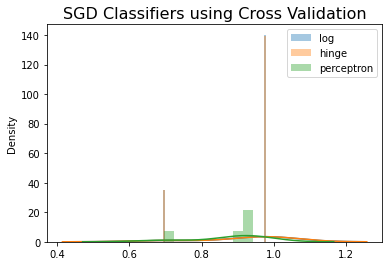

In [ ]:
scores_df = pd.DataFrame(scores_list)

#plot hinge, log and perceptron
sns.distplot(scores_list[0]['cv'],label='log')
sns.distplot(scores_list[1]['cv'],label='hinge')
sns.distplot(scores_list[2]['cv'],label='perceptron')
plt.title('SGD Classifiers using Cross Validation', size=16)
plt.legend()
plt.show()

## SGD Classifier with regularization

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
avg_list=[]
for a in alphas:
  model2 =SGDClassifier(loss='log',penalty='l1' , alpha=a,class_weight='balanced').fit(X_train_scaled,y_res)
  model3 =SGDClassifier(loss='log',penalty='l2' , alpha=a,class_weight='balanced').fit(X_train_scaled,y_res)
  l1cv = cross_val_score(model2, X_train_scaled,y_res, cv=5 , scoring='accuracy')
  l2cv = cross_val_score(model3, X_train_scaled,y_res, cv=5 , scoring='accuracy')
  results.append({'alpha': a, 'log L1': l1cv, 'log L2': l2cv})
  avg_list.append({'alpha':a, 'log L1':l1cv.mean() , 'log L2':l2cv.mean()})

In [ ]:
#Accuracy Table by alpha value
reg_df=pd.DataFrame(avg_list)
reg_df


,alpha,log L1,log L2
0,0.0001,0.920321,0.920041
1,0.0010,0.921725,0.920637
2,0.0100,0.909234,0.921181
3,0.1000,0.705064,0.917392
4,1.0000,0.500018,0.906304
5,10.0000,0.500000,0.501228
6,100.0000,0.500000,0.499982
7,1000.0000,0.500000,0.499982


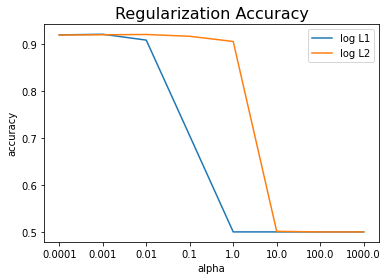

In [ ]:
#L1/L2 Regularization Accuracy Plot
plt.plot (reg_df['log L1'],label="log L1")
plt.plot (reg_df['log L2'],label="log L2")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks(range(len(reg_df['alpha'])),reg_df['alpha'])
plt.title('Regularization Accuracy', size=16)
plt.legend()

0.8970771921059205
[[7182    0]
 [ 824    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7182
           1       0.00      0.00      0.00       824

    accuracy                           0.90      8006
   macro avg       0.45      0.50      0.47      8006
weighted avg       0.80      0.90      0.85      8006



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


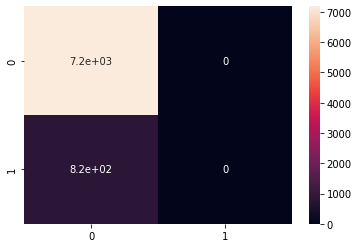

In [ ]:
#validate the model
prediction2=model2.predict(X_test)
print(accuracy_score(y_test, prediction2))


#Confusion matrix
cm=confusion_matrix(y_test,prediction2)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, prediction2))


0.10379715213589807
[[   7 7175]
 [   0  824]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7182
           1       0.10      1.00      0.19       824

    accuracy                           0.10      8006
   macro avg       0.55      0.50      0.09      8006
weighted avg       0.91      0.10      0.02      8006



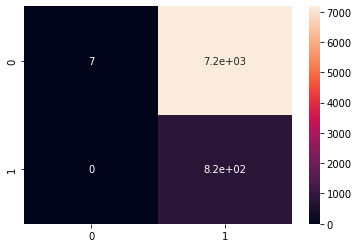

In [ ]:
#validate the model
prediction3=model3.predict(X_test)
print(accuracy_score(y_test, prediction3))


#Confusion matrix
cm=confusion_matrix(y_test,prediction3)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, prediction3))

## Logistic Regression

In [ ]:
#Logistic Regression and tuning hyperparameters 
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
lr =LogisticRegression(solver='liblinear',random_state=42,class_weight='balanced')
model4= GridSearchCV(lr, tuned_parameters, cv=5, scoring="accuracy")
model4.fit(X_train_scaled, y_res)

#validate the model
prediction4=model4.predict(X_test)
print(accuracy_score(y_tes, prediction4))

#Confusion matrix
cm=confusion_matrix(y_test,prediction4)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, prediction4))



In [ ]:
#best parameters for Logistic Regression classifier
model4.best_params_

{'C': 0.1}

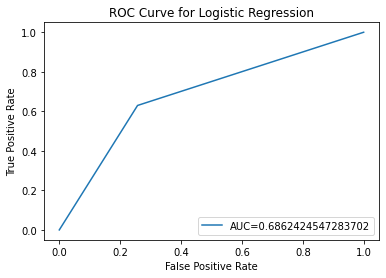

In [ ]:
# ROC Curve for Logistic Regression

fpr, tpr,_ = metrics.roc_curve(y_test_u, prediction4)
auc = metrics.roc_auc_score(y_test_u, prediction4)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve for Logistic Regression')
plt.show()

# KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8839986730067455
[[7910   42]
 [1007   84]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.67      0.08      0.14      1091

    accuracy                           0.88      9043
   macro avg       0.78      0.54      0.54      9043
weighted avg       0.86      0.88      0.84      9043



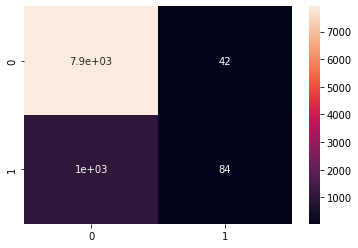

In [ ]:
from sklearn.utils import class_weight
# knn and tuning hyperparameters 
k_range = list(range(1, 31))
tuned_parameters= dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
model5=GridSearchCV(knn, tuned_parameters, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
model5.fit(X_train, y_train)

#validate the model
prediction5=model5.predict(X_test)
print(accuracy_score(y_test, prediction5))

#Confusion matrix
cm=confusion_matrix(y_test,prediction5)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, prediction5))


In [ ]:
#best parameters for KNN classifier
model5.best_params_


{'n_neighbors': 8}

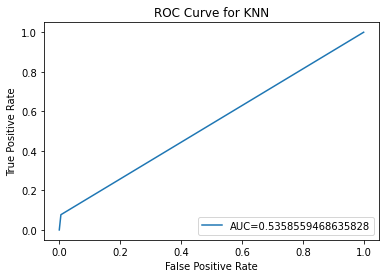

In [ ]:
# ROC Curve for KNN classifier
fpr, tpr,_ = metrics.roc_curve(y_test, prediction5)
auc = metrics.roc_auc_score(y_test, prediction5)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve for KNN')
plt.show()

# Random Forest Classifier

In [ ]:
# random forest tuning hyperparameters 
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


rfc=RandomForestClassifier(random_state=42,class_weight='balanced')
model6 = GridSearchCV(rfc,tuned_parameters, cv= 5,scoring="accuracy")
model6.fit(X_train_u, y_train_u)



#validate the model
prediction6=model6.predict(X_test_u)
print(accuracy_score(y_test_u, prediction6))

#Confusion matrix
cm=confusion_matrix(y_test_u,prediction6)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test_u, prediction6))



In [ ]:
#best parameters for RandomForest classifier
model6.best_params_



{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

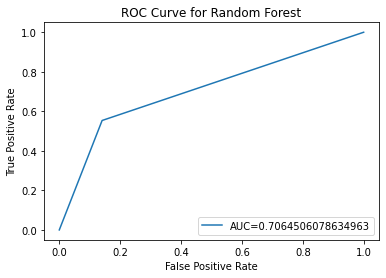

In [ ]:
# ROC Curve for RandomForest classifier
fpr, tpr,_ = metrics.roc_curve(y_test, prediction6)
auc = metrics.roc_auc_score(y_test, prediction6)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve for Random Forest')
plt.show()

In [ ]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    
    
    classifier.add(Dense(units = 32, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return classifier

In [ ]:
#classifier = Sequential()
kerasreg= KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
tuned_parameters = {'batch_size': [16, 32, 64],
              'epochs': [80, 100],
              'optimizer': ['adam', 'rmsprop']}
model7= GridSearchCV(kerasreg,
                           param_grid = tuned_parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
model7.fit(X_train, y_train, verbose = 0)


# XGBoost

In [ ]:
import os
import xgboost as xgb
model8 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model8.fit(X_train_u,y_train_u)
prediction8 = model8.predict(X_test_u)



In [ ]:
accuracy_score(y_test_u, prediction8)

0.6952337305224565

In [ ]:
print(classification_report(y_test_u, prediction8))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1091
           1       0.75      0.59      0.66      1091

    accuracy                           0.70      2182
   macro avg       0.70      0.70      0.69      2182
weighted avg       0.70      0.70      0.69      2182



In [ ]:
#pip install imbalanced-learn

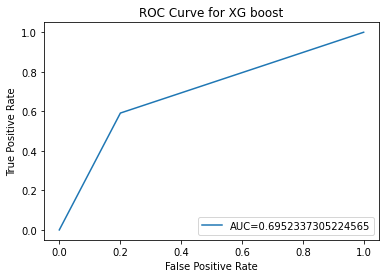

In [ ]:
# ROC Curve for RandomForest classifier
fpr, tpr,_ = metrics.roc_curve(y_test_u, prediction8)
auc = metrics.roc_auc_score(y_test_u, prediction8)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve for XG boost')
plt.show()

#Neural Networks

In [ ]:
from keras import models
from keras import layers

number_of_features = X_train_u.shape[1]
model11 = Sequential()
model11.add(layers.Dense(units=30, activation='relu'))
model11.add(layers.Dense(units=15, activation='relu'))
model11.add(layers.Dense(units=15, activation='relu'))
model11.add(layers.Dense(units=1, activation='sigmoid'))

model11.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['mean_absolute_error'])

hist= model11.fit(X_train_u, 
                      y_train_u, 
                      epochs=150, 
                      verbose=1, 
                      batch_size=100 , validation_data=(X_test_u,y_test_u))



In [ ]:
#validate the model
yhat_probs = model11.predict(X_test_u, verbose=0)

yhat_probs
a=[]

for i in yhat_probs:
  if i < 0.50:
    i=0
  if i >= 0.50:
    i=1
  a.append(i)



0.6750687442713107
[[729 362]
 [347 744]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1091
           1       0.67      0.68      0.68      1091

    accuracy                           0.68      2182
   macro avg       0.68      0.68      0.68      2182
weighted avg       0.68      0.68      0.68      2182



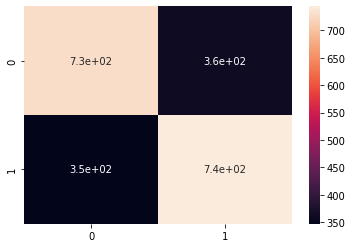

In [ ]:

print(accuracy_score(y_test_u, a))

#Confusion matrix
cm=confusion_matrix(y_test_u,a)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test_u, a))

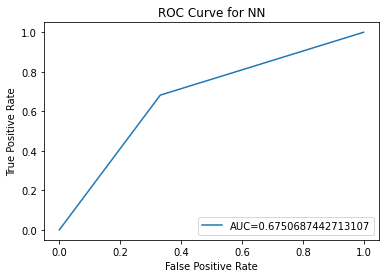

In [ ]:
# ROC Curve for RandomForest classifier
fpr, tpr,_ = metrics.roc_curve(y_test_u, a)
auc = metrics.roc_auc_score(y_test_u, a)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve for NN')
plt.show()


In [ ]:


X_train_scaled.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)



In [ ]:
X_train_scaled.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [ ]:
X_train_scaled.drop([ 'default_yes'],axis=1,inplace=True)


In [ ]:
X_test_scaled.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [ ]:
X_test_scaled.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [ ]:
X_test_scaled.drop([ 'default_yes'],axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_scaled,y_res)
y_pred = clf.predict(X_test_scaled)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[5898 1284]
 [ 449  375]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7182
           1       0.23      0.46      0.30       824

    accuracy                           0.78      8006
   macro avg       0.58      0.64      0.59      8006
weighted avg       0.86      0.78      0.81      8006

0.7835373469897576


In [ ]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_res)
y_pred = lr.predict(X_test_scaled)



In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3848 3334]
 [ 248  576]]
0.5525855608293779
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      7182
           1       0.15      0.70      0.24       824

    accuracy                           0.55      8006
   macro avg       0.54      0.62      0.46      8006
weighted avg       0.86      0.55      0.64      8006

